# About

On this notebook we setup the last and complete steps for the pipeline.

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
# Definitions

REGION = "TrianguloBernal"

In [51]:
from tqdm import tqdm
tqdm.pandas()

import tools

In [52]:
subset = tools.load_subset(REGION)
subset

Subset TrianguloBernal loaded with 16947 entries.


latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  
0      POLYGON((-58.3050328825488 -34.7020374379253, ...  48Q37MXV+5XWW  
1      POLYGON((-58.3038539724378 -34.7140132693254, ...  48Q37MPW+9FC5  
2      POLYGON((-58.2977744357533 -34.6987862246148, ...  48Q38P22+FVFW  
3      POLYGON((-58.3003290234067 -34.6994127473659, ...  48Q38M2X+6VRJ  
4      POLYGON((-58.3115304985152 -34.7055145489511, ...  48Q37MVQ+Q9VJ  
...                                                  ...            ...  
16942  POLYGON((-58.298419224023 -34.7045191377154, -...  48Q37PW2+5HWH  
16943  POLYGON((-58.2959629997062 -34.7091946597883, ...  48Q37PR3+8HG4  
16944  POLYGON((-58.2998263281376 -34.7004983411411, ...  48Q37PX2+R37F  
16945  POLYGON((-58.3125917622081 -34.7054424546673, ...  48Q37MVP+RWGH  
16946  POLYGON((-58.2986050068943 -34.7065569103296, ...  48Q37PV2+9G87  

[16947 rows x 6 columns]

In [53]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  
0      POLYGON ((-58.30503 -34.70204, -58.30501 -34.7...  48Q37MXV+5XWW  
1      POLYGON ((-58.30385 -34.71401, -58.30392 -34.7...  48Q37MPW+9FC5  
2      POLYGON ((-58.29777 -34.69879, -58.2978 -34.69...  48Q38P22+FVFW  
3      POLYGON ((-58.30033 -34.69941, -58.30032 -34.6...  48Q38M2X+6VRJ  
4      POLYGON ((-58.31153 -34.70551, -58.3116 -34.70...  48Q37MVQ+Q9VJ  
...                                                  ...            ...  
16942  POLYGON ((-58.29842 -34.70452, -58.29861 -34.7...  48Q37PW2+5HWH  
16943  POLYGON ((-58.29596 -34.70919, -58.29602 -34.7...  48Q37PR3+8HG4  
16944  POLYGON ((-58.29983 -34.7005, -58.29981 -34.70...  48Q37PX2+R37F  
16945  POLYGON ((-58.31259 -34.70544, -58.31267 -34.7...  48Q37MVP+RWGH  
16946  POLYGON ((-58.29861 -34.70656, -58.29864 -34.7...  48Q37PV2+9G87  

[16947 rows x 6 columns]

<Axes: >

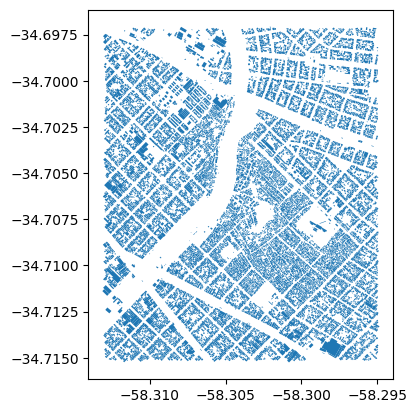

In [54]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [55]:
long_area_center, lat_area_center = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.30393699029126, -34.70679395131642


<Axes: >

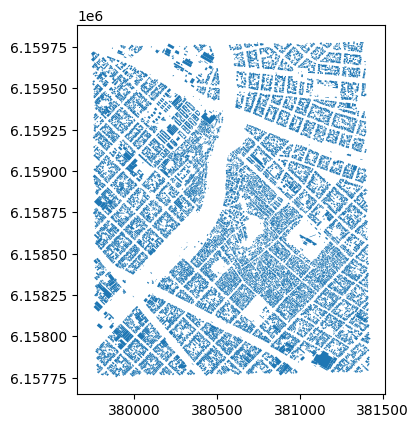

In [56]:
# Now we convert the representation system to UTM
subset = tools.convert_to_UTM(subset)
subset.plot()

In [57]:
area_center_x, area_center_y = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.30393699029126, -34.70679395131642


In [58]:
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  \
0      POLYGON ((380479.853 6159224.038, 380482.261 6...  48Q37MXV+5XWW   
1      POLYGON ((380605.041 6157897.306, 380599.209 6...  48Q37MPW+9FC5   
2      POLYGON ((381140.001 6159593.198, 381137.349 6...  48Q38P22+FVFW   
3      POLYGON ((380906.916 6159520.696, 380907.396 6...  48Q38M2X+6VRJ   
4      POLYGON ((379889.765 6158830.685, 379883.551 6...  48Q37MVQ+Q9VJ   
...                                                  ...            ...   
16942  POLYGON ((381089.147 6158956.652, 381071.863 6...  48Q37PW2+5HWH   
16943  POLYGON ((381320.783 6158441.032, 381315.723 6...  48Q37PR3+8HG4   
16944  POLYGON ((380954.514 6159400.898, 380956.214 6...  48Q37PX2+R37F   
16945  POLYGON ((379792.464 6158837.413, 379784.971 6...  48Q37MVP+RWGH   
16946  POLYGON ((381075.048 6158730.441, 381071.846 6...  48Q37PV2+9G87   

             coord_x       coord_y  
0      380478.678455  6.159228e+06  
1      380606.013417  6.157891e+06  
2      381135.354965  6.159592e+06  
3      380902.917379  6.159524e+06  
4      379884.373273  6.158831e+06  
...              ...           ...  
16942  381078.311239  6.158958e+06  
16943  381313.304982  6.158441e+06  
16944  380953.950700  6.159405e+06  
16945  379785.978080  6.158838e+06  
16946  381068.414061  6.158727e+06  

[16947 rows x 8 columns]

In [59]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  \
0      POLYGON ((380479.853 6159224.038, 380482.261 6...  48Q37MXV+5XWW   
1      POLYGON ((380605.041 6157897.306, 380599.209 6...  48Q37MPW+9FC5   
2      POLYGON ((381140.001 6159593.198, 381137.349 6...  48Q38P22+FVFW   
3      POLYGON ((380906.916 6159520.696, 380907.396 6...  48Q38M2X+6VRJ   
4      POLYGON ((379889.765 6158830.685, 379883.551 6...  48Q37MVQ+Q9VJ   
...                                                  ...            ...   
16942  POLYGON ((381089.147 6158956.652, 381071.863 6...  48Q37PW2+5HWH   
16943  POLYGON ((381320.783 6158441.032, 381315.723 6...  48Q37PR3+8HG4   
16944  POLYGON ((380954.514 6159400.898, 380956.214 6...  48Q37PX2+R37F   
16945  POLYGON ((379792.464 6158837.413, 379784.971 6...  48Q37MVP+RWGH   
16946  POLYGON ((381075.048 6158730.441, 381071.846 6...  48Q37PV2+9G87   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      380478.678455  6.159228e+06 -108.379665  530.221915     -11      53   
1      380606.013417  6.157891e+06   18.955297 -807.300560       1     -81   
2      381135.354965  6.159592e+06  548.296844  893.708016      54      89   
3      380902.917379  6.159524e+06  315.859259  825.902757      31      82   
4      379884.373273  6.158831e+06 -702.684847  133.356661     -71      13   
...              ...           ...         ...         ...     ...     ...   
16942  381078.311239  6.158958e+06  491.253118  259.652795      49      25   
16943  381313.304982  6.158441e+06  726.246862 -257.229499      72     -26   
16944  380953.950700  6.159405e+06  366.892580  707.005446      36      70   
16945  379785.978080  6.158838e+06 -801.080040  140.209459     -81      14   
16946  381068.414061  6.158727e+06  481.355941   28.688482      48       2   

       size_in_cells  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
16942              2  
16943              1  
16944              1  
16945              1  
16946              1  

[16947 rows x 13 columns]

In [60]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 167/167 [00:02<00:00, 79.94it/s]


In [61]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 16947/16947 [00:08<00:00, 2027.17it/s]


latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  \
0      POLYGON ((380479.853 6159224.038, 380482.261 6...  48Q37MXV+5XWW   
1      POLYGON ((380605.041 6157897.306, 380599.209 6...  48Q37MPW+9FC5   
2      POLYGON ((381140.001 6159593.198, 381137.349 6...  48Q38P22+FVFW   
3      POLYGON ((380906.916 6159520.696, 380907.396 6...  48Q38M2X+6VRJ   
4      POLYGON ((379889.765 6158830.685, 379883.551 6...  48Q37MVQ+Q9VJ   
...                                                  ...            ...   
16942  POLYGON ((381089.147 6158956.652, 381071.863 6...  48Q37PW2+5HWH   
16943  POLYGON ((381320.783 6158441.032, 381315.723 6...  48Q37PR3+8HG4   
16944  POLYGON ((380954.514 6159400.898, 380956.214 6...  48Q37PX2+R37F   
16945  POLYGON ((379792.464 6158837.413, 379784.971 6...  48Q37MVP+RWGH   
16946  POLYGON ((381075.048 6158730.441, 381071.846 6...  48Q37PV2+9G87   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      380478.678455  6.159228e+06 -108.379665  530.221915     -11      53   
1      380606.013417  6.157891e+06   18.955297 -807.300560       1     -81   
2      381135.354965  6.159592e+06  548.296844  893.708016      54      89   
3      380902.917379  6.159524e+06  315.859259  825.902757      31      82   
4      379884.373273  6.158831e+06 -702.684847  133.356661     -71      13   
...              ...           ...         ...         ...     ...     ...   
16942  381078.311239  6.158958e+06  491.253118  259.652795      49      25   
16943  381313.304982  6.158441e+06  726.246862 -257.229499      72     -26   
16944  380953.950700  6.159405e+06  366.892580  707.005446      36      70   
16945  379785.978080  6.158838e+06 -801.080040  140.209459     -81      14   
16946  381068.414061  6.158727e+06  481.355941   28.688482      48       2   

       size_in_cells                                        overlapping  
0                  1  [{'x_cell': -12, 'y_cell': 52, 'area': 3.87719...  
1                  1  [{'x_cell': 1, 'y_cell': -82, 'area': 9.157901...  
2                  1  [{'x_cell': 54, 'y_cell': 88, 'area': 9.002002...  
3                  1  [{'x_cell': 31, 'y_cell': 82, 'area': 45.25873...  
4                  1  [{'x_cell': -71, 'y_cell': 12, 'area': 3.99959...  
...              ...                                                ...  
16942              2  [{'x_cell': 48, 'y_cell': 25, 'area': 20.85664...  
16943              1  [{'x_cell': 71, 'y_cell': -26, 'area': 2.32964...  
16944              1  [{'x_cell': 36, 'y_cell': 70, 'area': 19.77002...  
16945              1  [{'x_cell': -81, 'y_cell': 13, 'area': 20.9482...  
16946              1  [{'x_cell': 47, 'y_cell': 2, 'area': 23.517942...  

[16947 rows x 14 columns]

In [62]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [63]:
# Now we will add the orientation information for each building
subset = tools.add_building_orientation(subset)
subset

100%|██████████| 16947/16947 [00:02<00:00, 7227.75it/s]


latitude  longitude  area_in_meters  confidence  \
0     -34.702001 -58.305045         34.1649      0.6802   
1     -34.714074 -58.303844         91.0215      0.8365   
2     -34.698800 -58.297825         85.1059      0.8493   
3     -34.699385 -58.300372         45.9291      0.7044   
4     -34.705509 -58.311589         56.9035      0.6667   
...          ...        ...             ...         ...   
16942 -34.704510 -58.298537        178.6552      0.8560   
16943 -34.709197 -58.296045         83.6708      0.7584   
16944 -34.700463 -58.299832         21.6898      0.7118   
16945 -34.705436 -58.312662         82.2594      0.7577   
16946 -34.706591 -58.298678         64.6633      0.7420   

                                                geometry full_plus_code  \
0      POLYGON ((380479.853 6159224.038, 380482.261 6...  48Q37MXV+5XWW   
1      POLYGON ((380605.041 6157897.306, 380599.209 6...  48Q37MPW+9FC5   
2      POLYGON ((381140.001 6159593.198, 381137.349 6...  48Q38P22+FVFW   
3      POLYGON ((380906.916 6159520.696, 380907.396 6...  48Q38M2X+6VRJ   
4      POLYGON ((379889.765 6158830.685, 379883.551 6...  48Q37MVQ+Q9VJ   
...                                                  ...            ...   
16942  POLYGON ((381089.147 6158956.652, 381071.863 6...  48Q37PW2+5HWH   
16943  POLYGON ((381320.783 6158441.032, 381315.723 6...  48Q37PR3+8HG4   
16944  POLYGON ((380954.514 6159400.898, 380956.214 6...  48Q37PX2+R37F   
16945  POLYGON ((379792.464 6158837.413, 379784.971 6...  48Q37MVP+RWGH   
16946  POLYGON ((381075.048 6158730.441, 381071.846 6...  48Q37PV2+9G87   

             coord_x       coord_y  relative_x  relative_y  x_cell  y_cell  \
0      380478.678455  6.159228e+06 -108.379665  530.221915     -11      53   
1      380606.013417  6.157891e+06   18.955297 -807.300560       1     -81   
2      381135.354965  6.159592e+06  548.296844  893.708016      54      89   
3      380902.917379  6.159524e+06  315.859259  825.902757      31      82   
4      379884.373273  6.158831e+06 -702.684847  133.356661     -71      13   
...              ...           ...         ...         ...     ...     ...   
16942  381078.311239  6.158958e+06  491.253118  259.652795      49      25   
16943  381313.304982  6.158441e+06  726.246862 -257.229499      72     -26   
16944  380953.950700  6.159405e+06  366.892580  707.005446      36      70   
16945  379785.978080  6.158838e+06 -801.080040  140.209459     -81      14   
16946  381068.414061  6.158727e+06  481.355941   28.688482      48       2   

       size_in_cells                                        overlapping  \
0                  1  [{'x_cell': -12, 'y_cell': 52, 'area': 3.87719...   
1                  1  [{'x_cell': 1, 'y_cell': -82, 'area': 9.157901...   
2                  1  [{'x_cell': 54, 'y_cell': 88, 'area': 9.002002...   
3                  1  [{'x_cell': 31, 'y_cell': 82, 'area': 45.25873...   
4                  1  [{'x_cell': -71, 'y_cell': 12, 'area': 3.99959...   
...              ...                                                ...   
16942              2  [{'x_cell': 48, 'y_cell': 25, 'area': 20.85664...   
16943              1  [{'x_cell': 71, 'y_cell': -26, 'area': 2.32964...   
16944              1  [{'x_cell': 36, 'y_cell': 70, 'area': 19.77002...   
16945              1  [{'x_cell': -81, 'y_cell': 13, 'area': 20.9482...   
16946              1  [{'x_cell': 47, 'y_cell': 2, 'area': 23.517942...   

       orientation_angle  eccentricity  
0              68.936035      0.649400  
1             137.253948      0.585013  
2              86.365172      0.704621  
3             174.895112      0.773712  
4             136.550192      0.630057  
...                  ...           ...  
16942         150.925466      0.889686  
16943         149.697307      0.827677  
16944          76.839170      0.921286  
16945         136.550537      0.635485  
16946          46.952545      0.954853  

[16947 rows x 16 columns]

In [64]:
intersections = tools.build_intersections_df(subset)
intersections

x_cell  y_cell       area    polygon_tag  fraction_of_the_building  \
0         -12      52   3.877197  48Q37MXV+5XWW                  0.113551   
1         -12      53   1.852428  48Q37MXV+5XWW                  0.054252   
2         -11      52  11.982025  48Q37MXV+5XWW                  0.350916   
3         -11      53  16.433304  48Q37MXV+5XWW                  0.481281   
4           1     -82   9.157901  48Q37MPW+9FC5                  0.100671   
...       ...     ...        ...            ...                       ...   
66973     -80      14  11.532578  48Q37MVP+RWGH                  0.140279   
66974      47       2  23.517943  48Q37PV2+9G87                  0.363912   
66975      47       3   0.093318  48Q37PV2+9G87                  0.001444   
66976      48       2  16.656827  48Q37PV2+9G87                  0.257744   
66977      48       3  24.357293  48Q37PV2+9G87                  0.376900   

       fraction_of_buildings_in_cell  
0                           0.497108  
1                           0.025677  
2                           0.548010  
3                           0.782756  
4                           0.104698  
...                              ...  
66973                       0.139588  
66974                       0.305248  
66975                       0.001350  
66976                       0.453375  
66977                       0.260697  

[66978 rows x 6 columns]

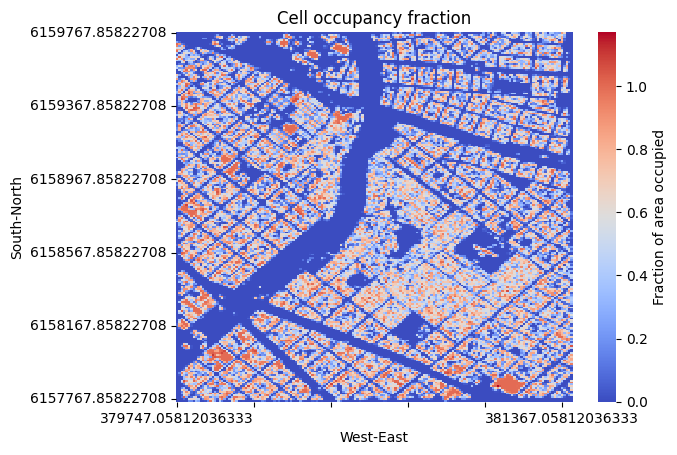

In [65]:
tools.plot_occupied_area_heatmap(intersections, area_center_x=area_center_x, area_center_y=area_center_y)

In [66]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
x_cell y_cell                                                   
-84    -53     [{'polygon_tag': '48Q37MQP+CR97', 'fraction_of...
       -52     [{'polygon_tag': '48Q37MQP+CR97', 'fraction_of...
       -46     [{'polygon_tag': '48Q37MQP+PRQ3', 'fraction_of...
       -45     [{'polygon_tag': '48Q37MQP+PRQ3', 'fraction_of...
       -35     [{'polygon_tag': '48Q37MRP+3R86', 'fraction_of...
...                                                          ...
 82     6      [{'polygon_tag': '48Q37PV3+FXGF', 'fraction_of...
        7      [{'polygon_tag': '48Q37PV4+F2RJ', 'fraction_of...
        8      [{'polygon_tag': '48Q37PV3+HXH9', 'fraction_of...
        9      [{'polygon_tag': '48Q37PV3+HXH9', 'fraction_of...
        18     [{'polygon_tag': '48Q37PV4+W22P', 'fraction_of...

[25362 rows x 1 columns]

In [67]:
cell_composition.iloc[20].values 

array([list([{'polygon_tag': '48Q37MWP+CRQJ', 'fraction_of_buildings_in_cell': 1.0, 'fraction_of_the_building': 0.07487609385658989, 'area': 12.300766273159963}])],
      dtype=object)

In [68]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

100%|██████████| 25362/25362 [01:25<00:00, 296.49it/s]


cell_composition  \
x_cell y_cell                                                      
-84    -53     [{'polygon_tag': '48Q37MQP+CR97', 'fraction_of...   
       -52     [{'polygon_tag': '48Q37MQP+CR97', 'fraction_of...   
       -46     [{'polygon_tag': '48Q37MQP+PRQ3', 'fraction_of...   
       -45     [{'polygon_tag': '48Q37MQP+PRQ3', 'fraction_of...   
       -35     [{'polygon_tag': '48Q37MRP+3R86', 'fraction_of...   
...                                                          ...   
 82     6      [{'polygon_tag': '48Q37PV3+FXGF', 'fraction_of...   
        7      [{'polygon_tag': '48Q37PV4+F2RJ', 'fraction_of...   
        8      [{'polygon_tag': '48Q37PV3+HXH9', 'fraction_of...   
        9      [{'polygon_tag': '48Q37PV3+HXH9', 'fraction_of...   
        18     [{'polygon_tag': '48Q37PV4+W22P', 'fraction_of...   

               orientation_angle  eccentricity  
x_cell y_cell                                   
-84    -53            136.359417      0.912932  
       -52            136.359417      0.912932  
       -46             46.898546      0.963644  
       -45             46.898546      0.963644  
       -35            136.013309      0.931022  
...                          ...           ...  
 82     6             137.363537      0.773665  
        7             137.363539      0.774024  
        8             137.706423      0.787374  
        9             137.706423      0.787374  
        18            155.364843      0.659229  

[25362 rows x 3 columns]

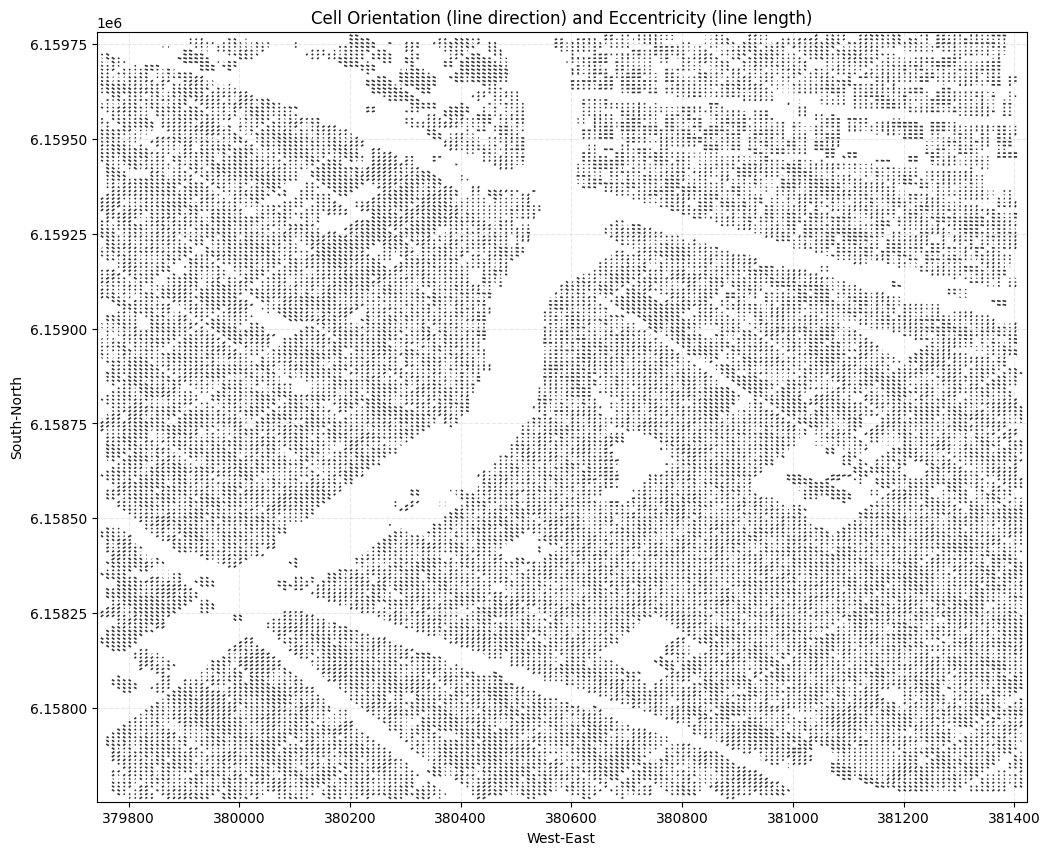

In [69]:
tools.plot_orientation_lines(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y)

density                                           geometry  \
0      0.122519  POLYGON ((-58.31318 -34.71147, -58.31307 -34.7...   
1      0.060669  POLYGON ((-58.31318 -34.71138, -58.31307 -34.7...   
2      0.002214  POLYGON ((-58.31317 -34.71084, -58.31306 -34.7...   
3      0.000331  POLYGON ((-58.31317 -34.71075, -58.31306 -34.7...   
4      0.003362  POLYGON ((-58.31316 -34.70985, -58.31305 -34.7...   
...         ...                                                ...   
25357  0.074387  POLYGON ((-58.29498 -34.70635, -58.29487 -34.7...   
25358  0.040244  POLYGON ((-58.29498 -34.70626, -58.29487 -34.7...   
25359  0.166212  POLYGON ((-58.29497 -34.70617, -58.29486 -34.7...   
25360  0.102961  POLYGON ((-58.29497 -34.70608, -58.29486 -34.7...   
25361  0.078131  POLYGON ((-58.29496 -34.70527, -58.29485 -34.7...   

       center_lon  center_lat  
0      -58.313128  -34.711429  
1      -58.313126  -34.711339  
2      -58.313118  -34.710798  
3      -58.313116  -34.710708  
4      -58.313102  -34.709806  
...           ...         ...  
25357  -58.294921  -34.706304  
25358  -58.294920  -34.706214  
25359  -58.294918  -34.706124  
25360  -58.294917  -34.706033  
25361  -58.294904  -34.705222  

[25362 rows x 4 columns]

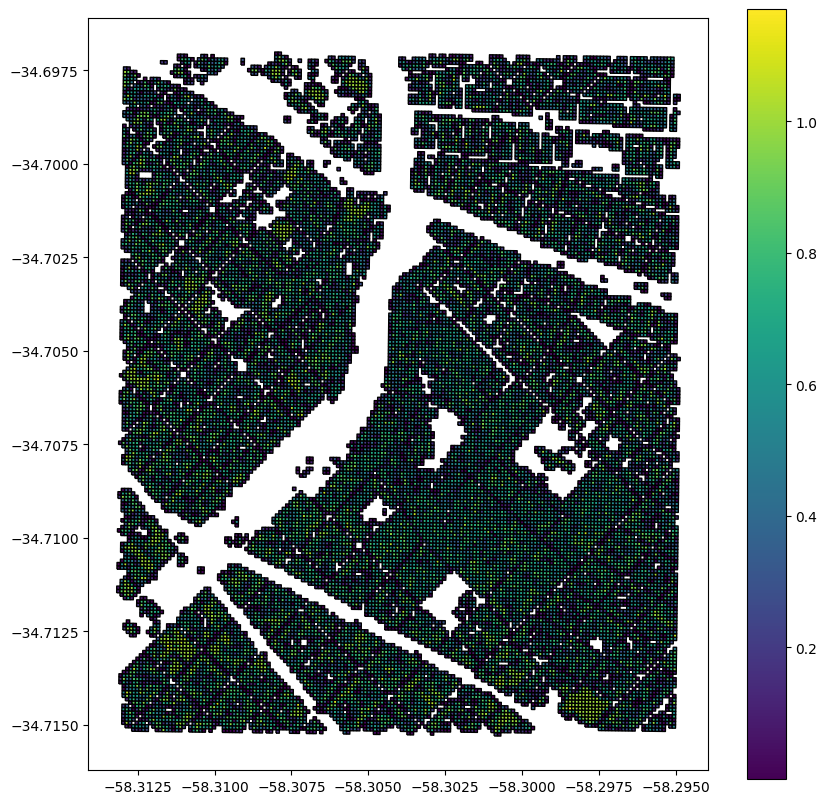

In [70]:
# Now we will save all outputs into geojson files
geo_density = tools.build_cell_density_geodataframe(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, reproject_to_latlon=True, utm_crs=subset.crs)
geo_density.plot(column="density", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_density.to_file(f"Outputs/{REGION}_cells_density.geojson", driver="GeoJSON")
geo_density

geometry full_plus_code  \
0      POLYGON ((-58.30503 -34.70204, -58.30501 -34.7...  48Q37MXV+5XWW   
1      POLYGON ((-58.30385 -34.71401, -58.30392 -34.7...  48Q37MPW+9FC5   
2      POLYGON ((-58.29777 -34.69879, -58.2978 -34.69...  48Q38P22+FVFW   
3      POLYGON ((-58.30033 -34.69941, -58.30032 -34.6...  48Q38M2X+6VRJ   
4      POLYGON ((-58.31153 -34.70551, -58.3116 -34.70...  48Q37MVQ+Q9VJ   
...                                                  ...            ...   
16942  POLYGON ((-58.29842 -34.70452, -58.29861 -34.7...  48Q37PW2+5HWH   
16943  POLYGON ((-58.29596 -34.70919, -58.29602 -34.7...  48Q37PR3+8HG4   
16944  POLYGON ((-58.29983 -34.7005, -58.29981 -34.70...  48Q37PX2+R37F   
16945  POLYGON ((-58.31259 -34.70544, -58.31267 -34.7...  48Q37MVP+RWGH   
16946  POLYGON ((-58.29861 -34.70656, -58.29864 -34.7...  48Q37PV2+9G87   

       orientation_angle  eccentricity  longitude   latitude  
0              68.936035      0.649400 -58.305045 -34.702001  
1             137.253948      0.585013 -58.303844 -34.714074  
2              86.365172      0.704621 -58.297825 -34.698800  
3             174.895112      0.773712 -58.300372 -34.699385  
4             136.550192      0.630057 -58.311589 -34.705509  
...                  ...           ...        ...        ...  
16942         150.925466      0.889686 -58.298537 -34.704510  
16943         149.697307      0.827677 -58.296045 -34.709197  
16944          76.839170      0.921286 -58.299832 -34.700463  
16945         136.550537      0.635485 -58.312662 -34.705436  
16946          46.952545      0.954853 -58.298678 -34.706591  

[16947 rows x 6 columns]

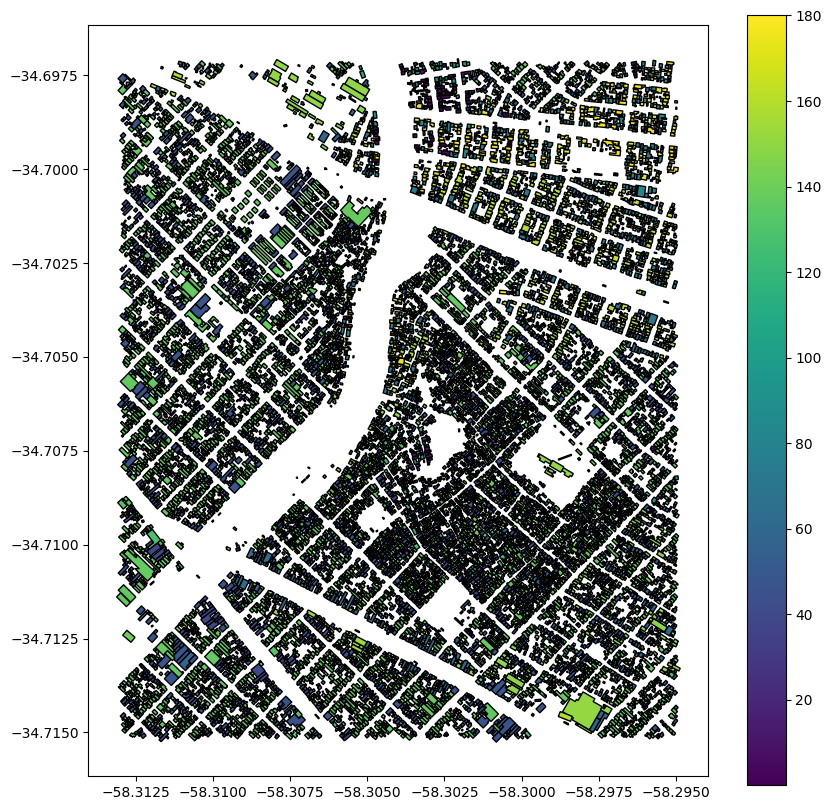

In [71]:
# Now we export the buildings orientation
geo_orientation = tools.build_building_orientation_geodataframe(subset, reproject_to_latlon=True, utm_crs=subset.crs)
geo_orientation.plot(column="orientation_angle", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_orientation.to_file(f"Outputs/{REGION}_buildings_orientation.geojson", driver="GeoJSON")
geo_orientation

orientation_angle  eccentricity  longitude   latitude  \
0             136.359417      0.912932 -58.313128 -34.711429   
1             136.359417      0.912932 -58.313126 -34.711339   
2              46.898546      0.963644 -58.313118 -34.710798   
3              46.898546      0.963644 -58.313116 -34.710708   
4             136.013309      0.931022 -58.313102 -34.709806   
...                  ...           ...        ...        ...   
25357         137.363537      0.773665 -58.294921 -34.706304   
25358         137.363539      0.774024 -58.294920 -34.706214   
25359         137.706423      0.787374 -58.294918 -34.706124   
25360         137.706423      0.787374 -58.294917 -34.706033   
25361         155.364843      0.659229 -58.294904 -34.705222   

                                                geometry  
0      POLYGON ((-58.31318 -34.71147, -58.31307 -34.7...  
1      POLYGON ((-58.31318 -34.71138, -58.31307 -34.7...  
2      POLYGON ((-58.31317 -34.71084, -58.31306 -34.7...  
3      POLYGON ((-58.31317 -34.71075, -58.31306 -34.7...  
4      POLYGON ((-58.31316 -34.70985, -58.31305 -34.7...  
...                                                  ...  
25357  POLYGON ((-58.29498 -34.70635, -58.29487 -34.7...  
25358  POLYGON ((-58.29498 -34.70626, -58.29487 -34.7...  
25359  POLYGON ((-58.29497 -34.70617, -58.29486 -34.7...  
25360  POLYGON ((-58.29497 -34.70608, -58.29486 -34.7...  
25361  POLYGON ((-58.29496 -34.70527, -58.29485 -34.7...  

[25362 rows x 5 columns]

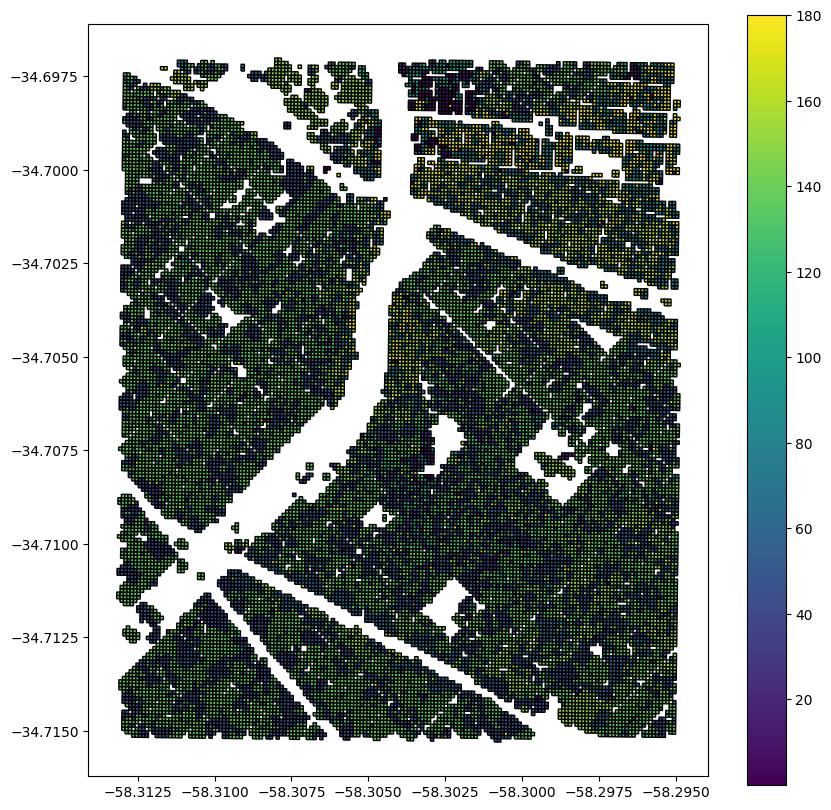

In [72]:
# And we export the cells orientation
geo_cells_orientation = tools.build_cell_orientation_geodataframe(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, reproject_to_latlon=True, utm_crs=subset.crs)
geo_cells_orientation.plot(column="orientation_angle", cmap="viridis", legend=True, figsize=(10, 10), edgecolor="black")
geo_cells_orientation.to_file(f"Outputs/{REGION}_cells_orientation.geojson", driver="GeoJSON")
geo_cells_orientation